In [71]:
from importlib import reload
from pathlib import Path

import modify_inc_analysis
reload(modify_inc_analysis)
from modify_inc_analysis import *

In [19]:
def get_paths(output_root, t_m):
    return [
        output_root / f"rep_source_mode__{s_m}" / f"rep_target_mode__{t_m}"
        for s_m in REP_SOURCE_MODES
    ]

def get_processors(paths):
    return [Processor(path=path)() for path in paths]

def get_analyzers(processors, chunk_size):
    return [Analyzer(data=p.data, chunk_size=chunk_size)() for p in processors]

def get_plotters(analyzers, labels):
    plotters = defaultdict(lambda: defaultdict(Plotter))
    for analyzer, label in zip(analyzers, labels):
        for m_1 in analyzer.fn_rates.keys():
            for m_2 in analyzer.fn_rates[m_1].keys():
                x, y = analyzer.fn_rates[m_1][m_2]
                plotters[m_1][m_2](x, y, label=label)
                plotters[m_1][m_2].markup(title="", x_label="", y_label="")
    return plotters

In [24]:
m_1 = "pro"
m_2 = "any"

In [41]:
chunk_size_ablt = 256
output_root_ablt = Path(
    "outputs/modify/model_name__gct/softmax__False/layer__None/"
    "alg__FeatureAblation/baselines__0/feature_mask_mode__text/"
    f"feature_mask_size__{chunk_size_ablt}/method__None/n_steps__None/"
    "perturbations_per_eval__None/sliding_window_shapes_size__None/"
    "strides__None/target__1"
)

In [52]:
t_m = "most"
paths = [p for p in get_paths(output_root_ablt, t_m) if p.exists()]
processors = get_processors(paths)
analyzers = get_analyzers(processors, chunk_size_ablt)
analyzers_ablt = analyzers

In [53]:
t_m = "random"
paths = [p for p in get_paths(output_root_ablt, t_m) if p.exists()]
processors = get_processors(paths)
analyzers = get_analyzers(processors, chunk_size_ablt)
analyzers_ablt.append(analyzers[1])

In [46]:
chunk_size_shap = 64
output_root_shap = Path(
    "outputs/modify/model_name__gct/softmax__False/layer__None/"
    "alg__KernelShap/baselines__0/feature_mask_mode__text/"
    f"feature_mask_size__64/method__None/n_steps__None/"
    "perturbations_per_eval__None/sliding_window_shapes_size__None/"
    "strides__None/target__1"
)

In [ ]:
t_m = "most"
paths_shap = [p for p in get_paths(output_root_shap, t_m) if p.exists()]
processors_shap = get_processors(paths_shap)
analyzers_shap = get_analyzers(processors_shap, chunk_size_shap)

In [47]:
t_m = "random"
paths = [p for p in get_paths(output_root_shap, t_m) if p.exists()]
processors = get_processors(paths)
analyzers = get_analyzers(processors, chunk_size_shap)
analyzers_shap.append(analyzers[1])

In [78]:
t_m = "ordered"
paths = [p for p in get_paths(output_root_shap, t_m) if p.exists()]
processors = get_processors(paths)
analyzers = get_analyzers(processors, chunk_size_shap)
analyzer_ordered = analyzers[0]

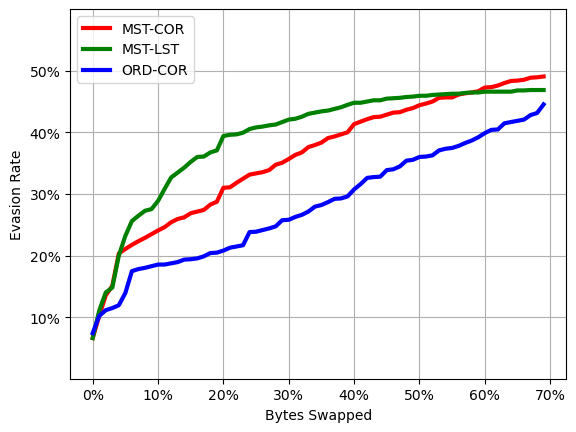

In [84]:
LABELS = ("MST+COR", "MST+LST", "RND+LST")
COLORS = ("red", "green", "blue", "yellow")

LABELS = ("MST-COR", "MST-LST", "ORD-COR")

#analyzers_ablt = analyzers_ablt[0:3]
#analyzers_shap = analyzers_shap[0:3]

plotter = Plotter()
for i, analyzer in enumerate(analyzers_ablt[0:2] + [analyzer_ordered]):
    x, y = analyzer.fn_rates[m_1][m_2]
    plotter(x[0:70] * 100, y[0:70] * 100, label=LABELS[i], color=COLORS[i], linewidth=3.0)

# for i, analyzer in enumerate(analyzers_shap[1:2], 3):
#     x, y = analyzer.fn_rates[m_1][m_2]
#     plotter(x * 100, y * 100, label=LABELS[i], color=COLORS[i], linewidth=3.0)

#plotter.ax.set_title("Evasion Rate vs Bytes Swapped")
plotter.ax.set_xlabel("Bytes Swapped")
plotter.ax.set_ylabel("Evasion Rate")

plotter.ax.set_ylim([0, 60])

vals = plotter.ax.get_yticks()
vals = vals[1:-1]
plotter.ax.set_yticks(ticks=vals, labels=[f"{int(x)}%" for x in vals])

vals = plotter.ax.get_xticks()
vals = vals[1:-1]
plotter.ax.set_xticks(ticks=vals, labels=[f"{int(x)}%" for x in vals])

plotter.ax.legend()
plotter.ax.grid()

plotter.fig.savefig("fig1.svg")
plotter.fig.savefig("fig1.png", dpi=400)

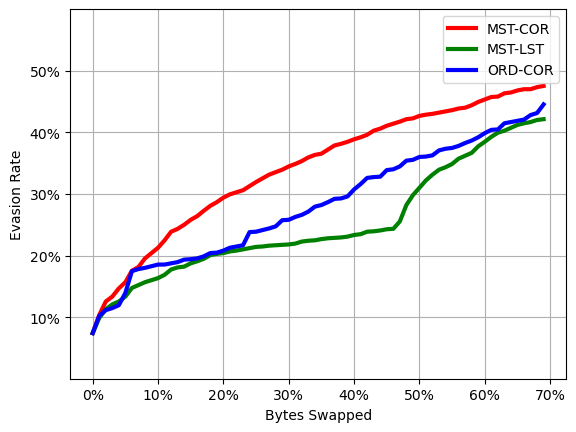

In [85]:
plotter = Plotter()
for i, analyzer in enumerate(analyzers_shap[0:2] + [analyzer_ordered]):
    x, y = analyzer.fn_rates[m_1][m_2]
    plotter(x[0:70] * 100, y[0:70] * 100, label=LABELS[i], color=COLORS[i], linewidth=3.0)

# for i, analyzer in enumerate(analyzers_shap[1:2], 3):
#     x, y = analyzer.fn_rates[m_1][m_2]
#     plotter(x * 100, y * 100, label=LABELS[i], color=COLORS[i], linewidth=3.0)

#plotter.ax.set_title("Evasion Rate vs Bytes Swapped")
plotter.ax.set_xlabel("Bytes Swapped")
plotter.ax.set_ylabel("Evasion Rate")

plotter.ax.set_ylim([0, 60])

vals = plotter.ax.get_yticks()
vals = vals[1:-1]
plotter.ax.set_yticks(ticks=vals, labels=[f"{int(x)}%" for x in vals])

vals = plotter.ax.get_xticks()
vals = vals[1:-1]
plotter.ax.set_xticks(ticks=vals, labels=[f"{int(x)}%" for x in vals])

plotter.ax.legend()
plotter.ax.grid()

plotter.fig.savefig("fig7.svg")
plotter.fig.savefig("fig7.png", dpi=400)